<a href="https://colab.research.google.com/github/Gurpinder60/customer_segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/drive/MyDrive/Customer Segmentation/customer_segmentation.csv')
print(df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


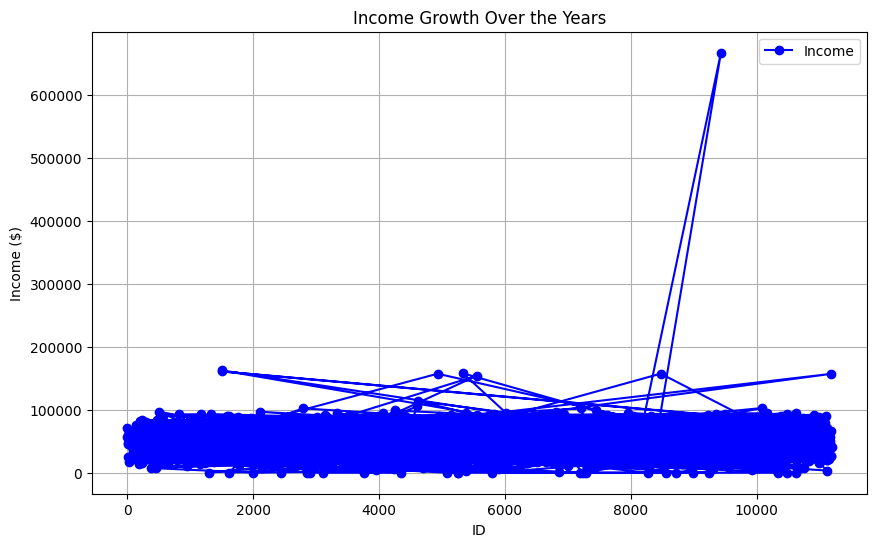

In [2]:
# Fill missing values
df.fillna(0, inplace=True)

ID = df['ID']
income = df['Income']
# Create the line plot
plt.figure(figsize=(10,6))
plt.plot(ID, income, marker='o', linestyle='-', color='b', label='Income')

# Adding titles and labels
plt.title('Income Growth Over the Years')
plt.xlabel('ID')
plt.ylabel('Income ($)')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [3]:
df = df[(df['Income'] >= 0) & (df['Income'] <= 200000)]


In [4]:
X_num = df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Income']]
print(X_num)

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth   Income  
0                     4                  7  58138.0  
1                     2                  5  46344.0  
2                    10                  4  71613.0  
3  

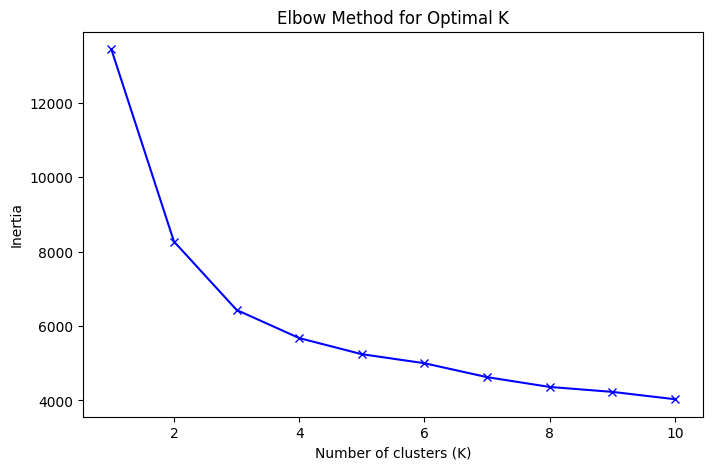

In [5]:
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(X_num)

# Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_num)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)

clusters = kmeans.fit_predict(X_scaled_num)

# Add cluster labels to the original DataFrame
X_num.loc[:,'Cluster'] = clusters
# Calculate silhouette score
kmeans_silhouette = silhouette_score(X_scaled_num, clusters)
print(f'K-means Silhouette Score: {kmeans_silhouette}')
cluster_stats = X_num.groupby('Cluster').agg(['mean', 'max', 'min'])
print(cluster_stats)

K-means Silhouette Score: 0.35454156192145164
        NumDealsPurchases         NumWebPurchases         NumCatalogPurchases  \
                     mean max min            mean max min                mean   
Cluster                                                                         
0                1.876877   5   0        2.021021   7   0            0.539540   
1                1.237918  15   0        4.355019   9   0            5.918216   
2                6.334677  15   3        6.068548  11   0            2.455645   
3                2.405286   5   0        7.224670  27   2            3.590308   

                NumStorePurchases         NumWebVisitsMonth          \
        max min              mean max min              mean max min   
Cluster                                                               
0         5   0          3.182182   9   0          6.420420  20   0   
1        28   0          8.301115  13   0          2.230483   7   0   
2        28   0          6.1733

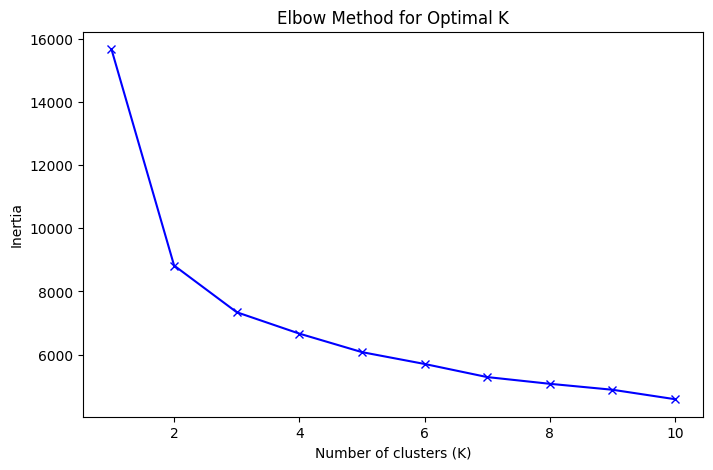

In [13]:
X_mnt = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Income']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_mnt)

# Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++',max_iter=500, random_state=42)

clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
X_mnt.loc[:, 'Cluster'] = clusters
# Calculate silhouette score
kmeans_silhouette = silhouette_score(X_scaled, clusters)
print(f'K-means Silhouette Score: {kmeans_silhouette}')
cluster_stats = X_mnt.groupby('Cluster').agg(['mean', 'max', 'min'])
print(cluster_stats)

K-means Silhouette Score: 0.422853789849797
           MntWines            MntFruits          MntMeatProducts            \
               mean   max min       mean  max min            mean   max min   
Cluster                                                                       
0         86.514331   738   0   5.999204  103   0       33.361465   359   0   
1        461.077670  1486   5  28.101942  172   0      168.407767   774   3   
2        526.311178  1394   6  91.459215  199   0      445.471299   984   3   
3        679.269058  1493   1  34.318386  169   0      336.109865  1725   1   

        MntFishProducts  ...     MntSweetProducts          MntGoldProds       \
                   mean  ... min             mean  max min         mean  max   
Cluster                  ...                                                   
0              8.902070  ...   0         6.265127  157   0    17.032643   91   
1             33.252427  ...   0        27.378641  263   0   144.524272  362   
2 